### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This document is the continuation of the singleDLC_Labeling.ipynb and should only be run after the labeling process is complete. Here the training dataset will be constructed to then proceed for the training of the model.
##### After that, the database folder with all the videos can be loaded and a new result directory is created with the analysis of the videos (with the best iteration of the model), i.e., the data file with the coordinates of the predictions (.h5) and a video with the predictions shown. In the end, there is an example of how to apply some of the functions to see how the output looks like.

## THIS DOCUMENT SHOULD BE RUN IN THE ONLINE JUPYTER NOTEBOOK PLATFORM!! (not on vscode)

In [1]:
''' Importing DLC - Important to be the most recent version available on the git hub'''
import deeplabcut
print(deeplabcut.__version__)

2.2.0.6


In [2]:
''' Select the config.yaml file of the project initiated in the previous script.

NOTE: When you run this cell, a new window opens to select the database folder with all the results. The new window
usually opens behind the code editor software.
'''
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw()
config_path = askopenfilename(title='Choose the config.yaml file', initialdir='D:\_users\Duarte_Projects') # show an "Open" dialog box and return the path to the selected file

print(config_path)

D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16/config.yaml


In [ ]:
''' If it comes directly from the labeling then this is not needed. However, is useful if the images were cropped using 
the G_Streamer and the labels were adjusted using the rescale_labels_final.ipynb'''

# This creates the frames used for training, with '+' signs in the points of the labels.
deeplabcut.check_labels(config_path, visualizeindividuals=False)
print('done checking')

### This script can be broken up here, since the next step should only be run in the place where the training will happen. This means it should be done in a computer/drive with enough memory and capable GPUs to train the deep neural networks. If the placement of the DLC project changes, go to the config.yaml file and edit the project_path variable.

In [4]:
# This will create a series of back-end variables and few folders in the project to hold the snapshots while training the model
deeplabcut.create_training_dataset(config_path, augmenter_type='imgaug', net_type='resnet_101')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([418,  59, 245, 117, 567,   1, 598, 718, 160, 247, 465, 153, 463,
          298, 644,   2, 510, 478, 231, 625, 152, 533, 629, 363, 671, 440,
          370, 474, 306, 312, 150, 239, 666,  38, 613, 406, 573, 638, 394,
          479, 359, 429, 592, 230,  89, 104, 441, 663, 211, 616, 662, 198,
          433, 451, 582, 214, 201,  64, 475, 248, 578,  92, 707,  55, 249,
          612, 384, 382, 695, 122, 602, 371, 325, 621, 561, 540, 237, 704,
          426,  95, 485, 348, 650, 676, 640, 492,  39, 402,  70, 633,  91,
          484, 273,  16, 170, 367, 538, 148, 399, 232, 550, 424, 293, 675,
          169, 125, 100, 411, 508,  12, 459,  83, 314, 397,  10, 345, 605,
          166, 285, 234, 674,  21, 395, 503,  45, 472, 527, 113, 589, 480,
          455,  62, 558, 532, 450, 542, 665, 403,  27, 683, 577, 654, 335,
          124, 642, 495, 119,   5,   9, 272, 581, 544, 628, 701,  43, 127,
          548, 346, 366, 112, 182, 297, 657, 509, 145, 246,  68, 380, 417,
           2

In [5]:
#Edits to make the pose_cgf file adequate
from os import path

#it would be cool to have an automatic way to get the pose_cfg here - there is in the maDLC code
pose_path=r"D:\_users\Duarte_Projects\LL_Correct_Crop-Duarte-2022-05-16\dlc-models\iteration-0\LL_Correct_CropMay16-trainset95shuffle1\train\pose_cfg.yaml"

#Transfer learning with the weights of other model already trained for a similar task - attention that in needs to be the same network type
edits = {
    'init_weights': "D:\_users\Duarte_Projects\Left_Lateral_Model\snapshot-150000"
}
deeplabcut.auxiliaryfunctions.edit_config(pose_path, edits)


ordereddict([('all_joints', [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]]), ('all_joints_names', ['finger1', 'wrist1', 'elbow1', 'shoulder1', 'finger2', 'wrist2', 'elbow2', 'shoulder2', 'chin', 'robot_joint', 'robot_top', 'robot_base', 'robot_logo']), ('alpha_r', 0.02), ('apply_prob', 0.5), ('batch_size', 1), ('clahe', True), ('claheratio', 0.1), ('crop_sampling', 'hybrid'), ('crop_size', [400, 400]), ('cropratio', 0.4), ('dataset', 'training-datasets\\iteration-0\\UnaugmentedDataSet_LL_Correct_CropMay16\\LL_Correct_Crop_Duarte95shuffle1.mat'), ('dataset_type', 'imgaug'), ('decay_steps', 30000), ('display_iters', 1000), ('edge', False), ('emboss', ordereddict([('alpha', [0.0, 1.0]), ('embossratio', 0.1), ('strength', [0.5, 1.5])])), ('global_scale', 0.8), ('histeq', True), ('histeqratio', 0.1), ('init_weights', 'D:\\_users\\Duarte_Projects\\Left_Lateral_Model\\snapshot-150000'), ('intermediate_supervision', False), ('intermediate_supervision_layer', 12), ('locati

In [ ]:
# Allow_growth=true  ->  important not to allocate instantly all the GPU memmory -> in this setting it llocates what it needs for the batch
# As this is using the pre_trained model weights, to avaid having problems -> keepdeconvweights=False (only the output layer gets disregarded)
# Since the computer only has one gpu, it's index in the system is 0 -> gputouse=0
# all the other parameters are explained in the dlc documentation
deeplabcut.train_network(config_path, shuffle=1, trainingsetindex=0, max_snapshots_to_keep=7, autotune=False, displayiters=100, saveiters=25000, maxiters=200000, gputouse=0, allow_growth=True,keepdeconvweights=False)

### Evaluating the model and choosing the best snapshot

In [14]:
# this uses the model to compute predictions on the training dataset, and then does the RMSE to see how accurate the model is generally
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=False, gputouse=0)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['finger1',
                      'wrist1',
                      'elbow1',
                      'shoulder1',
                      'finger2',
                      'wrist2',
                      'elbow2',
                      'shoulder2',
                      'chin',
                      'robot_joint',
                      'robot_top',
                      'robot_base',
                      'robot_logo'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_LL_Correct_CropMay16\\LL_Correct_Crop_Duarte95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'D:\

Running  DLC_resnet101_LL_Correct_CropMay16shuffle1_50000  with # of training iterations: 50000
Running evaluation ...


720it [00:26, 27.45it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.84 pixels. Test error: 3.95  pixels.
With pcutoff of 0.8  train error: 2.84 pixels. Test error: 3.89 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


In [31]:
import os
import dlc2kinematics
import pandas as pd
from IPython.display import display

Unnamed: 0  Training iterations:  %Training dataset  Shuffle number  \
0           0                 50000                 95               1   
1           1                 75000                 95               1   
2           2                100000                 95               1   
3           3                125000                 95               1   
4           4                150000                 95               1   
5           5                175000                 95               1   
6           6                200000                 95               1   

    Train error(px)   Test error(px)  p-cutoff used  \
0              2.84             3.95            0.8   
1              2.39             3.54            0.8   
2              2.07             3.24            0.8   
3              2.08             4.17            0.8   
4              2.13             3.48            0.8   
5              1.72             3.13            0.8   
6              2.02             3.11            0.8   

   Train error with p-cutoff  Test error with p-cutoff  
0                       2.84                      3.89  
1                       2.39                      3.46  
2                       2.07                      3.10  
3                       2.08                      3.34  
4                       2.13                      3.34  
5                       1.72                      3.04  
6                       2.02                      2.96

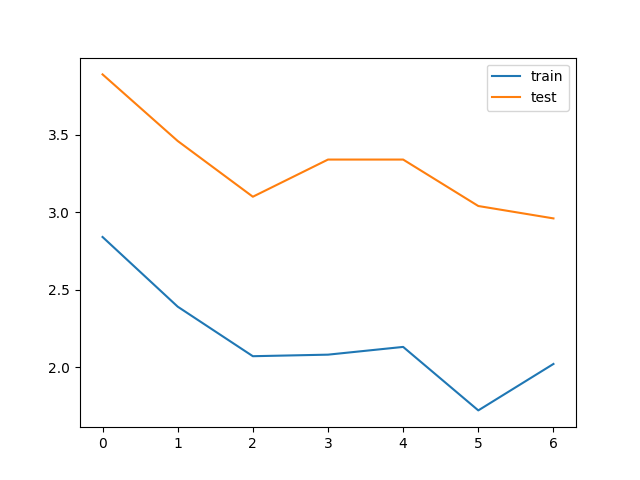

In [45]:
# Plotting the evolution of the errors

# eval_res_folder = r"D:\_users\Duarte_Projects\LL_Correct_Crop-Duarte-2022-05-16\evaluation-results\iteration-0\LL_Correct_CropMay16-trainset95shuffle1"
# for root, dirs, files in os.walk(eval_res_folder):
#     for filename in files:
# #         print(filename[-3:])
#         if filename[-3:] == '.h5':
#             eval_res_path = os.path.join(root,filename)
#             df, bodyparts, scorer = dlc2kinematics.load_data(eval_res_path)
#             display(df)
#             break
#     break

from matplotlib import pyplot as plt
# data for the mean test and train error for the snapshots
combined_path = r"D:\_users\Duarte_Projects\LL_Correct_Crop-Duarte-2022-05-16\evaluation-results\iteration-0\CombinedEvaluation-results.csv"
df = pd.read_csv(combined_path)
display(df)

train_err = list(df['Train error with p-cutoff'])
test_err = list(df['Test error with p-cutoff'])


ind = range(7)
%matplotlib widget
# plot lines -> choose the lowest test error
plt.plot(ind, train_err , label = "train")
plt.plot(ind, test_err, label = "test")
plt.legend()
plt.show()



In [7]:
''' these are the prediction results just for the training frames! The next step is to take all the videos with all of their frames and run the model on them!'''
import pandas as pd
from IPython.display import display
path_to_h5=r"D:\_users\Duarte_Projects\Left_Lateral-Duarte-2022-03-29\evaluation-results\iteration-0\Left_LateralMar29-trainset95shuffle1\DLC_resnet101_Left_LateralMar29shuffle1_150000-snapshot-150000.h5"
results = pd.read_hdf(path_to_h5)
display(results)

scorer                                           DLC_resnet101_Left_LateralMar29shuffle1_150000  \
bodyparts                                                                               finger1   
coords                                                                                        x   
labeled-data HC_11_L_syncdownsampled img0120.png                                     179.340778   
                                     img0435.png                                     171.560853   
                                     img0626.png                                     166.550379   
                                     img0834.png                                     182.331393   
                                     img1207.png                                     161.474679   
...                                                                                         ...   
             PD_29_R_syncdownsampled img2125.png                                     238.046608   
                                     img2635.png                                     223.159243   
                                     img2811.png                                     235.383370   
                                     img3068.png                                     229.750306   
                                     img3183.png                                     240.011531   

scorer                                                                   \
bodyparts                                                                 
coords                                                     y likelihood   
labeled-data HC_11_L_syncdownsampled img0120.png  155.875989   0.007027   
                                     img0435.png  164.145951   0.010922   
                                     img0626.png  148.284140   0.010961   
                                     img0834.png  142.661893   0.010770   
                                     img1207.png  154.389218   0.007707   
...                                                      ...        ...   
             PD_29_R_syncdownsampled img2125.png  130.879808   0.999999   
                                     img2635.png  135.422361   0.999997   
                                     img2811.png  133.119534   0.999997   
                                     img3068.png  134.753021   0.999998   
                                     img3183.png  128.228582   0.999995   

scorer                                                                    \
bodyparts                                             wrist1               
coords                                                     x           y   
labeled-data HC_11_L_syncdownsampled img0120.png  255.517248  270.928365   
                                     img0435.png  255.114432  270.773475   
                                     img0626.png  254.923020  270.786648   
                                     img0834.png  255.250890  271.145513   
                                     img1207.png  255.048453  270.696716   
...                                                      ...         ...   
             PD_29_R_syncdownsampled img2125.png  289.097656  146.281778   
                                     img2635.png  278.551469  149.239502   
                                     img2811.png  286.440562  148.587576   
                                     img3068.png  282.106887  150.049136   
                                     img3183.png  289.520113  144.771865   

scorer                                                                   \
bodyparts                                                        elbow1   
coords                                           likelihood           x   
labeled-data HC_11_L_syncdownsampled img0120.png   0.999993  281.630473   
                                     img0435.png   0.999991  235.066796   
                                     img0626.png   0.999994  295.533970   
                                     img0834.pn

### Full database analysis

In [6]:
''' Select a folder with all the videos you want to have completely analyzed. This can be the entire database of videos. 
Start by 2 or 3 videos that have good lighting and postion setup to see if the model works properly.
For the analysis and prediction process to be faster these videos should at least be downsampled to the 512x288 size. preferably also cropped.

In the end, it will create a directory per video in the project.

NOTE: When you run this cell, a new window opens to select the database folder with all the results. The new window
usually opens behind the code editor software.
'''
import os
from tkinter import Tk  
from tkinter.filedialog import askdirectory

Tk().withdraw()
# the name of the variable is Left_L because that was the first ever model created and it just stuck here
left_L = askdirectory(title='Select the folder with the videos you want to analyze', initialdir='D:\_users\Duarte_Projects')

# iterates through the directory and collects the paths of all the videos
videos_test=[]
for root, dirs, files in os.walk(left_L):
    for filename in files:
        # print(os.path.join(root, filename) + '    ' + filename[-3:])
        if filename[-3:] == 'MP4' or filename[-3:] == 'mp4' or filename[-3:] == 'avi' or filename[-3:] == 'MOV' or filename[-3:] == 'mov':
            videoname=os.path.join(root, filename)
            videos_test.append(videoname)
print(videos_test)

['//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_17\\HC_17_L_asyncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_17\\HC_17_L_syncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_17\\HC_17_R_asyncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_17\\HC_17_R_syncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_18\\HC_18_L_asyncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_18\\HC_18_L_syncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\\HC_18\\HC_18_R_asyncdownsampled.MP4', '//svfas5.epfl.ch/blanke-lab/

In [7]:
for vid in videos_test:
    file_mp4 = os.path.basename(vid)
    filename = file_mp4[:-15] # this minus value depends if the videos are just downsampled or also downcropped
    print(filename)

HC_17_L_async
HC_17_L_sync
HC_17_R_async
HC_17_R_sync
HC_18_L_async
HC_18_L_sync
HC_18_R_async
HC_18_R_delay_01
HC_18_R_delay_02
HC_18_R_delay_03
HC_18_R_sync
HC_19_L_async
HC_19_L_sync
HC_19_R_async
HC_19_R_delay_01
HC_19_R_delay_02
HC_19_R_sync
HC_20_L_async
HC_20_L_sync
HC_20_R_async
HC_20_R_sync
HC_25_L_async
HC_25_L_sync
HC_25_R_async
HC_25_R_sync
PD_30_L_async
PD_30_L_sync
PD_30_R_async
PD_30_R_delay_01
PD_30_R_delay_02
PD_30_R_sync
PD_32_L_async
PD_32_L_sync
PD_32_R_async
PD_32_R_delay_02
PD_32_R_delay_03
PD_32_R_delay_0
PD_32_R_sync
PD_34_L_sync
PD_34_R_async
PD_34_R_sync
PD_39_L_async
PD_39_L_sync
PD_39_R_async
PD_39_R_delay
PD_39_R_sync
PD_40_L_async
PD_40_L_delay_01
PD_40_L_delay_02
PD_40_L_delay_03
PD_40_L_sync
PD_40_R_async
PD_40_R_sync
PD_41_L_async
PD_41_L_sync
PD_41_R_async
PD_41_R_sync


In [8]:
''' In the videos folder of the projec, it creates a "project_results" folder. Inside this one, each video will have its own
folder with the prediction data (.h5) and video auto-labeled with those predictions.

To iterate through the entire database it can take entire days of computing. Depending on how many cores the PC has the
computer may become super slow.'''

import os

# creates the results folder
videos_folder=os.path.join(os.path.dirname(config_path),'videos')
ll_folder=os.path.join(videos_folder,'project_results') # CHANGE TO BE MORE SPECIFIC
if not os.path.exists(ll_folder):
    os.mkdir(ll_folder)


for vid in videos_test:
    file_mp4 = os.path.basename(vid)
    filename = file_mp4[:-15]#ALWAYS VERIFY THIS LINE -> -13 for downcrop | -15 for downsampling
    destiny=os.path.join(ll_folder,filename) #This destiny folder prevents from creating files in the videos directory in the project folder! makes things more organized
    if not os.path.exists(destiny):
        os.mkdir(destiny)

        # Allow_growth=true  ->  important not to allocate instantly all the GPU memmory, same as when training
        deeplabcut.analyze_videos(config_path, vid, calibrate= True, shuffle=1, trainingsetindex=0, gputouse=0, save_as_csv=True, destfolder=destiny, allow_growth=True)

        deeplabcut.plot_trajectories(config_path, vid, destfolder=destiny) # creates plots to help verify the efficacy (in accuracy and precision) of the predictions
        print('Starting to label the video...')
        deeplabcut.create_labeled_video(config_path,vid, save_frames=True, destfolder=destiny, draw_skeleton = True ) # creates the auto-labeled video with the predictions
        print('New labeled videos successfully created!')

        deeplabcut.analyzeskeleton(config_path, vid, save_as_csv=True, destfolder=destiny) #info for angle and length of skeleton -> the skeleton data does not look very promising in this project.
    

Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\iteration-0\LL_Correct_CropMay16-trainset95shuffle1


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_asyncdownsampled.MP4
Duration of video [s]:  123.44 , recorded with  25.0 fps!
Overall # of frames:  3086  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3090it [00:44, 69.86it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_17_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_syncdownsampled.MP4
Duration of video [s]:  120.6 , recorded with  25.0 fps!
Overall # of frames:  3015  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3030it [00:43, 70.10it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_17_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_L_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_asyncdownsampled.MP4
Duration of video [s]:  121.68 , recorded with  25.0 fps!
Overall # of frames:  3042  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3060it [00:43, 70.12it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_17_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_syncdownsampled.MP4
Duration of video [s]:  115.68 , recorded with  25.0 fps!
Overall # of frames:  2892  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


2912it [00:41, 70.62it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_17_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_17\HC_17_R_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_asyncdownsampled.MP4
Duration of video [s]:  123.64 , recorded with  25.0 fps!
Overall # of frames:  3091  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3120it [00:42, 72.75it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_syncdownsampled.MP4
Duration of video [s]:  122.84 , recorded with  25.0 fps!
Overall # of frames:  3071  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3090it [00:43, 71.85it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_L_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_asyncdownsampled.MP4
Duration of video [s]:  43.76 , recorded with  25.0 fps!
Overall # of frames:  1094  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


1100it [00:15, 69.34it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_01downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_01downsampled.mp4
Duration of video [s]:  334.4 , recorded with  30.0 fps!
Overall # of frames:  10032  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


10100it [02:16, 73.77it/s]                                                                                             


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_R_delay_01...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_01downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_01downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_02downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_02downsampled.mp4
Duration of video [s]:  317.97 , recorded with  30.0 fps!
Overall # of frames:  9539  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9595it [02:13, 72.11it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_R_delay_02...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_02downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_02downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_03downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_03downsampled.mp4
Duration of video [s]:  304.53 , recorded with  30.0 fps!
Overall # of frames:  9136  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9191it [02:06, 72.65it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_R_delay_03...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_03downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_delay_03downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_syncdownsampled.MP4
Duration of video [s]:  121.48 , recorded with  25.0 fps!
Overall # of frames:  3037  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3060it [00:44, 68.08it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_18_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_18\HC_18_R_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_asyncdownsampled.mp4
Duration of video [s]:  89.52 , recorded with  25.0 fps!
Overall # of frames:  2238  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


2244it [00:33, 67.42it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_syncdownsampled.mp4
Duration of video [s]:  120.04 , recorded with  25.0 fps!
Overall # of frames:  3001  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3030it [00:44, 68.22it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_asyncdownsampled.mp4
Duration of video [s]:  107.32 , recorded with  25.0 fps!
Overall # of frames:  2683  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


2704it [00:39, 68.96it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_01downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_01downsampled.mp4
Duration of video [s]:  311.8 , recorded with  30.0 fps!
Overall # of frames:  9354  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9393it [02:16, 68.72it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_R_delay_01...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_01downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_01downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_02downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_02downsampled.mp4
Duration of video [s]:  305.93 , recorded with  30.0 fps!
Overall # of frames:  9178  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9191it [02:06, 72.58it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_R_delay_02...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_02downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_delay_02downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_syncdownsampled.mp4
Duration of video [s]:  78.56 , recorded with  25.0 fps!
Overall # of frames:  1964  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


1976it [00:27, 71.95it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_19_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_19\HC_19_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_asyncdownsampled.MP4
Duration of video [s]:  123.48 , recorded with  25.0 fps!
Overall # of frames:  3087  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3090it [00:42, 71.94it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_20_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_syncdownsampled.MP4
Duration of video [s]:  124.32 , recorded with  25.0 fps!
Overall # of frames:  3108  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3131it [00:43, 72.55it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_20_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_L_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_asyncdownsampled.MP4
Duration of video [s]:  126.92 , recorded with  25.0 fps!
Overall # of frames:  3173  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3193it [00:45, 70.48it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_20_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_syncdownsampled.MP4
Duration of video [s]:  119.12 , recorded with  25.0 fps!
Overall # of frames:  2978  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


2987it [00:41, 72.44it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_20_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_20\HC_20_R_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_asyncdownsampled.MP4
Duration of video [s]:  122.2 , recorded with  25.0 fps!
Overall # of frames:  3055  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3060it [00:42, 71.95it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_25_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_syncdownsampled.MP4
Duration of video [s]:  122.0 , recorded with  25.0 fps!
Overall # of frames:  3050  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3060it [00:42, 71.51it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_25_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_L_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_asyncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_asyncdownsampled.MP4
Duration of video [s]:  125.04 , recorded with  25.0 fps!
Overall # of frames:  3126  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3131it [00:43, 72.27it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_25_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_asyncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_asyncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_syncdownsampled.MP4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_syncdownsampled.MP4
Duration of video [s]:  68.24 , recorded with  25.0 fps!
Overall # of frames:  1706  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


1717it [00:23, 71.62it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\HC_25_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_syncdownsampled.MP4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\HC_25\HC_25_R_syncdownsampled.MP4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_asyncdownsampled.mp4
Duration of video [s]:  120.87 , recorded with  30.0 fps!
Overall # of frames:  3626  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:49, 72.81it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_syncdownsampled.mp4
Duration of video [s]:  120.93 , recorded with  30.0 fps!
Overall # of frames:  3628  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 71.97it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_asyncdownsampled.mp4
Duration of video [s]:  120.87 , recorded with  30.0 fps!
Overall # of frames:  3626  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 71.81it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_01downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_01downsampled.mp4
Duration of video [s]:  300.63 , recorded with  30.0 fps!
Overall # of frames:  9019  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:03, 73.62it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_R_delay_01...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_01downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_01downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_02downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_02downsampled.mp4
Duration of video [s]:  300.6 , recorded with  30.0 fps!
Overall # of frames:  9018  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:03, 73.52it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_R_delay_02...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_02downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_delay_02downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_syncdownsampled.mp4
Duration of video [s]:  120.9 , recorded with  30.0 fps!
Overall # of frames:  3627  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 72.54it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_30_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_30\PD_30_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_asyncdownsampled.mp4
Duration of video [s]:  120.37 , recorded with  30.0 fps!
Overall # of frames:  3611  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 72.22it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_syncdownsampled.mp4
Duration of video [s]:  74.2 , recorded with  30.0 fps!
Overall # of frames:  2226  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


2244it [00:31, 71.42it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_asyncdownsampled.mp4
Duration of video [s]:  120.37 , recorded with  30.0 fps!
Overall # of frames:  3611  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 72.56it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_02downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_02downsampled.mp4
Duration of video [s]:  300.47 , recorded with  30.0 fps!
Overall # of frames:  9014  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:04, 73.10it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_R_delay_02...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_02downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_02downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_03downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_03downsampled.mp4
Duration of video [s]:  300.47 , recorded with  30.0 fps!
Overall # of frames:  9014  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:04, 72.73it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_R_delay_03...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_03downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_03downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_0downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_0downsampled.mp4
Duration of video [s]:  300.43 , recorded with  30.0 fps!
Overall # of frames:  9013  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:05, 72.71it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_R_delay_0...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_0downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_delay_0downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dl

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_syncdownsampled.mp4
Duration of video [s]:  120.37 , recorded with  30.0 fps!
Overall # of frames:  3611  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:49, 72.87it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_32_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_32\PD_32_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_L_syncdownsampled.mp4
Duration of video [s]:  120.2 , recorded with  30.0 fps!
Overall # of frames:  3606  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 72.49it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_34_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_asyncdownsampled.mp4
Duration of video [s]:  120.2 , recorded with  30.0 fps!
Overall # of frames:  3606  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:49, 73.21it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_34_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_syncdownsampled.mp4
Duration of video [s]:  120.23 , recorded with  30.0 fps!
Overall # of frames:  3607  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:49, 73.01it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_34_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_34\PD_34_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_asyncdownsampled.mp4
Duration of video [s]:  123.7 , recorded with  30.0 fps!
Overall # of frames:  3711  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3737it [00:51, 72.26it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_39_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_syncdownsampled.mp4
Duration of video [s]:  116.97 , recorded with  30.0 fps!
Overall # of frames:  3509  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3535it [00:48, 72.38it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_39_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_asyncdownsampled.mp4
Duration of video [s]:  119.63 , recorded with  30.0 fps!
Overall # of frames:  3589  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3605it [00:50, 72.04it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_39_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_delaydownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_delaydownsampled.mp4
Duration of video [s]:  300.57 , recorded with  30.0 fps!
Overall # of frames:  9017  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:03, 73.47it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_39_R_delay...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_delaydownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_delaydownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_syncdownsampled.mp4
Duration of video [s]:  121.03 , recorded with  30.0 fps!
Overall # of frames:  3631  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 72.11it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_39_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_39\PD_39_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_asyncdownsampled.mp4
Duration of video [s]:  120.53 , recorded with  30.0 fps!
Overall # of frames:  3616  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:50, 71.95it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_01downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_01downsampled.mp4
Duration of video [s]:  293.67 , recorded with  30.0 fps!
Overall # of frames:  8810  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


8888it [02:00, 73.60it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_L_delay_01...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_01downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_01downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_02downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_02downsampled.mp4
Duration of video [s]:  299.03 , recorded with  30.0 fps!
Overall # of frames:  8971  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


8989it [02:04, 72.03it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_L_delay_02...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_02downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_02downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_03downsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_03downsampled.mp4
Duration of video [s]:  301.23 , recorded with  30.0 fps!
Overall # of frames:  9037  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


9090it [02:05, 72.69it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_L_delay_03...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_03downsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_delay_03downsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_syncdownsampled.mp4
Duration of video [s]:  120.47 , recorded with  30.0 fps!
Overall # of frames:  3614  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3636it [00:49, 73.05it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_asyncdownsampled.mp4
Duration of video [s]:  126.83 , recorded with  30.0 fps!
Overall # of frames:  3805  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3838it [00:52, 73.04it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_syncdownsampled.mp4
Duration of video [s]:  125.6 , recorded with  30.0 fps!
Overall # of frames:  3768  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3774it [00:52, 71.69it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_40_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_40\PD_40_R_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_asyncdownsampled.mp4
Duration of video [s]:  125.1 , recorded with  30.0 fps!
Overall # of frames:  3753  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3774it [00:52, 71.83it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_41_L_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_syncdownsampled.mp4
Duration of video [s]:  124.13 , recorded with  30.0 fps!
Overall # of frames:  3724  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3737it [00:51, 72.69it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_41_L_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_L_syncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-models\

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_asyncdownsampled.mp4
Duration of video [s]:  168.3 , recorded with  30.0 fps!
Overall # of frames:  5049  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


5050it [01:10, 71.76it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_41_R_async...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_asyncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_asyncdownsampled.mp4
Using snapshot-175000 for model D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\dlc-mode

D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_syncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_syncdownsampled.mp4
Duration of video [s]:  129.3 , recorded with  30.0 fps!
Overall # of frames:  3879  found with (before cropping) frame dimensions:  512 288
Starting to extract posture


3914it [00:54, 72.20it/s]                                                                                              


Saving results in D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16\videos\RL_ORIGINAL_Results\PD_41_R_sync...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Starting to label the video...
New labeled videos successfully created!
Processing //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_lateral\PD_41\PD_41_R_syncdownsampled.mp4


### Choose one video to make predictions (to be used as a test for the DLC functions one by one)

In [8]:
from tkinter import Tk  
from tkinter.filedialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
videos = askopenfilename(title='Choose one video to test', initialdir='D:\_users\Duarte_Projects')
videos_test=list(videos)

#This can be the same used to label, or new ones
print(videos_test)

# IMPORTANT TO DEFINE THE DESTINY DIRECTORY !!
destiny = r'D:/_users/Duarte_Projects/LL_Correct_Crop-Duarte-2022-05-16/individual_result'

['//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Left_lateral/LL_Train/HC_11_L_syncdownsampled.MOV', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Left_lateral/LL_Train/PD_25_R_syncdownsampled.mp4']


In [10]:
deeplabcut.plot_trajectories(config_path, videos_test, destfolder=destiny)

Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Left_lateral/LL_Train/HC_11_L_syncdownsampled.MOV and data.
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Left_lateral/LL_Train/PD_25_R_syncdownsampled.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [11]:
#This step takes time, to verify it is running go to the data, and there should be a new temp folder with increasing images
deeplabcut.create_labeled_video(config_path,videos_test, save_frames=True, destfolder=destiny, draw_skeleton = True )
print('New labeled videos successfully created!')

New labeled videos successfully created!


In [24]:
deeplabcut.analyzeskeleton(config_path, videos_test, save_as_csv=True, destfolder=destiny) # after create label video - info for angle and length of skeleton

Processing D:/_users/Duarte_Projects/Data/Left_diagonal/HC_12/HC_12_L_asyncdownsampled.MP4
Processing D:/_users/Duarte_Projects/Data/Left_diagonal/HC_12/HC_12_L_syncdownsampled.MP4


Apply filter to see how it works and if it is that different

In [30]:
# DLC has a built-in filter (ARIMA). It did not work on all of my tries. It should help remove the spikes, but unfortunatelly it does not.
deeplabcut.filterpredictions(config_path,videos_test, destfolder=destiny, videotype='.mp4',filtertype= 'spline')

Filtering with spline model D:/_users/Duarte_Projects/Data/Left_diagonal/HC_12/HC_12_L_asyncdownsampled.MP4
Data from HC_12_L_asyncdownsampled were already filtered. Skipping...
Filtering with spline model D:/_users/Duarte_Projects/Data/Left_diagonal/HC_12/HC_12_L_syncdownsampled.MP4
Data from HC_12_L_syncdownsampled were already filtered. Skipping...


In [28]:
#This step takes time, to verify it is running go to the data, and there should be a new temp folder with increasing images
# NOTE: Now the filtered parameter is True, so the video will be labeled with the results stored in the filtered.h5

deeplabcut.create_labeled_video(config_path,videos_test, save_frames=True, destfolder=destiny, draw_skeleton = True,filtered=True )
print('New labeled videos successfully created!')

New labeled videos successfully created!


EXTRA FUNCTIONS

In [ ]:
deeplabcut.add_new_videos(config_path, ['full path of video 4', 'full path of video 5'], copy_videos=True/False) #done whenever

deeplabcut.extract_save_all_maps(config_path, Indices=[6, 10]) # Done after the evaluation

deeplabcut.filterpredictions(config_path,video_train, videotype='.avi',filtertype= 'arima',ARdegree=5,MAdegree=2) # enhances the filtering around the predictions

deeplabcut.analyzeskeleton(config_path, videos, save_as_csv=True, destfolder=destiny) # after create label video - info for angle and length of skeleton